In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statistics

In [5]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code//annotated_G4plus_categories_explicit.csv')
reader = pd.read_csv(file, delimiter=',')
reader

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,chr1,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg
1,chr1,11058,11078,Canonical,33,0,0,0,gggctggggcggggggaggg
2,chr1,12487,12514,Bulge,1410,0,0,0,GGGTGGTAGGTGCAGAGACGGGAGGGG
3,chr1,14664,14683,Bulge,1267,0,0,0,GGGTCTGGGGGGGAAGGTG
4,chr1,15949,15973,Bulge,687,0,0,0,GGAGCCGGGAGGTGGGGAACAGGG
...,...,...,...,...,...,...,...,...,...
732447,chrY,59362173,59362191,Canonical,370,0,0,0,gggcgggcgggctgaggg
732448,chrY,59362560,59362587,Canonical,9,0,0,0,gggtgagggtgagggttggggttgggg
732449,chrY,59362595,59363470,G-track,9,0,0,0,ggggttggggttggggttggggttggggttagggtttgggtttagg...
732450,chrY,59363480,59363508,Bulge,11,0,0,0,gggtgtgtgtgggtgtggtgtgtgtggg


In [9]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotatedRand.bed')
reader_rd = pd.read_csv(file, delimiter='\t')

In [10]:
reader_rd

,chr,start,end,type,distClosestG4,sequence,CGI,Ori,TSS
0,chr1,10525,10551,Bulge,918,gccttcagagtaccaccgaaatctgt,0,0,0
1,chr1,11469,11503,Canonical,918,GGGAAACACCCGGAGCATATGCTGTTTGGTCTCA,0,0,0
2,chr1,16111,16130,Bulge,2181,GGGCACTGACTTCTGCAAC,0,0,0
3,chr1,18311,18332,Bulge,2181,GGGCCAAGGAGACCTTCTCTC,0,0,0
4,chr1,24560,24590,Bulge,2197,CCAGGAGTAAAAGCTTCCAAGTTGGGCTCT,0,0,0
...,...,...,...,...,...,...,...,...,...
668029,chr21,48080453,48080472,GVBQ,13906,ATGAATGAGACCTCACAGG,0,0,0
668030,chr21,48097556,48097580,Canonical,2272,caccatttattaaatagggaatcc,0,0,0
668031,chr21,48099852,48099882,GVBQ,2272,ggttcaaagctgattgggaagagtgtgatc,0,0,0
668032,chr21,48113314,48113335,GVBQ,4140,gtctttgccccattttatatt,0,0,0


### Analyse des données de mutations (cf Creation_des_fichiers_complets_de_mutation.ipynb)

In [11]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random/chr_random_1_sansN')
my_col = ['chr', 'pos', 'name', 'orig', 'mut', '%', 'PASS','INFOS', 'AA']
separateurs = "\t|AA="
reader2 = pd.read_csv(file2, sep = separateurs, names = my_col, header = None, engine ='python')
reader2 = reader2.drop_duplicates()
reader2 = reader2.reset_index(drop=True)

In [12]:
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA
0,1,10539,rs537182016,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=9203;EA...,.|||;VT=SNP
1,1,10542,rs572818783,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=9007;EA...,.|||;VT=SNP
2,1,16127,rs544021564,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=24602;E...,c|||;VT=SNP
3,1,58812,rs557388690,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=24132;E...,N|||;VT=SNP
4,1,58814,rs114420996,G,A,100,PASS,AC=546;AF=0.109026;AN=5008;NS=2504;DP=24093;EA...,g|||;VT=SNP
...,...,...,...,...,...,...,...,...,...
46645,1,249216443,rs560632912,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15455;E...,a|||;VT=SNP
46646,1,249216456,rs572451011,C,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15498;E...,c|||;VT=SNP
46647,1,249218097,rs537073360,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19204;E...,c|||;VT=SNP
46648,1,249218098,rs552245484,C,G,100,PASS,AC=7;AF=0.00139776;AN=5008;NS=2504;DP=19100;EA...,c|||;VT=SNP


In [16]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_1_final_sansN.csv')
reader2 = pd.read_csv(file2)
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,sequence,CGI,Ori,TSS
0,1,10539,rs537182016,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=9203;EA...,.|||;VT=SNP,10525,10551,Bulge,918,gccttcagagtaccaccgaaatctgt,0,0,0
1,1,10542,rs572818783,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=9007;EA...,.|||;VT=SNP,10525,10551,Bulge,918,gccttcagagtaccaccgaaatctgt,0,0,0
2,1,16127,rs544021564,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=24602;E...,c|||;VT=SNP,16111,16130,Bulge,2181,GGGCACTGACTTCTGCAAC,0,0,0
3,1,58812,rs557388690,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=24132;E...,N|||;VT=SNP,58787,58814,Canonical,3975,AATCAAACACATGGTCTTTTCCTCCAG,0,0,0
4,1,58814,rs114420996,G,A,100,PASS,AC=546;AF=0.109026;AN=5008;NS=2504;DP=24093;EA...,g|||;VT=SNP,58787,58814,Canonical,3975,AATCAAACACATGGTCTTTTCCTCCAG,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,1,249214746,rs138338484,T,C,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=23344;E...,t|||;VT=SNP,249214737,249214770,Bulge,1360,attattgatggacatttgggttggttccaagtc,0,0,0
44618,1,249216443,rs560632912,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15455;E...,a|||;VT=SNP,249216420,249216459,Bulge,1638,gctagttttttgtatttttggtagagacggggtttcacc,0,0,0
44619,1,249216456,rs572451011,C,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15498;E...,c|||;VT=SNP,249216420,249216459,Bulge,1638,gctagttttttgtatttttggtagagacggggtttcacc,0,0,0
44620,1,249218097,rs537073360,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19204;E...,c|||;VT=SNP,249218097,249218113,Bulge,1638,CAGCTACCAAGACAGC,0,0,0


On voit une diminution du nombre de lignes entre le fichier partiel et final : cela vient du fait que certaines lignes n'auraient pas dû apparaître, ne correspondant à aucun G4. Une brève analyse a permis de les éliminer.
On ne prendra donc en compte que le deuxième tableau.

In [17]:
list_chr = [str(i+1) for i in range (22)] + ['X']
nb_mutations_random = []
nb_mutations = []
nb_G4 = []
nb_G4_rd = []
for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations_random.append(n)
    
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations.append(n)
    
    nb_G4.append(len(reader[reader['chr'] == f'chr{i}']))
    nb_G4_rd.append(len(reader_rd[reader_rd['chr'] == f'chr{i}']))
    

In [18]:
nb_G4

[65260,
 53410,
 38652,
 29560,
 34223,
 33366,
 37912,
 31181,
 33786,
 34744,
 39900,
 31265,
 15591,
 22457,
 23874,
 32346,
 36161,
 14877,
 36931,
 22835,
 9298,
 20943,
 29361]

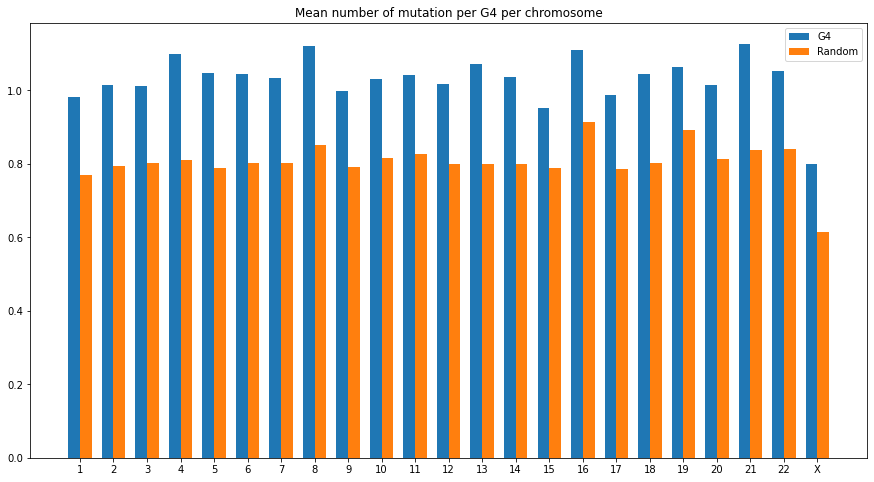

In [19]:
x = np.arange(len(nb_mutations))
largeur = .35

fig, ax = plt.subplots(figsize = (15,8))
r1 = ax.bar(x - largeur/2, np.array(nb_mutations).astype(float)/np.array(nb_G4).astype(float), largeur)
r2 = ax.bar(x + largeur/2, np.array(nb_mutations_random).astype(float)/np.array(nb_G4_rd).astype(float), largeur)

ax.set_xticks(x)
ax.set_xticklabels(list_chr)

plt.legend(['G4', 'Random'])

plt.title('Mean number of mutation per G4 per chromosome')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig14.jpg')
plt.show()

In [20]:
list_chr = [str(i+1) for i in range (22)] + ['X']
nb_mutations_random = 0
nb_mutations = 0
nb_G4 = 0
nb_G4_rd = 0
for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations_random += n
    
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2)
    n = len(reader2)
    nb_mutations += n
    
    nb_G4 += len(reader[reader['chr'] == f'chr{i}'])
    nb_G4_rd += len(reader_rd[reader_rd['chr'] == f'chr{i}'])

<ipython-input-23-ecf577530e85>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')


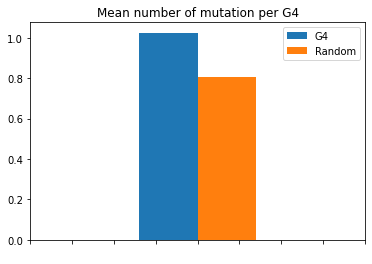

G4 :  1.0249404821597592 Random :  0.8035808114624399


In [23]:
x = 0
largeur = .35

fig, ax = plt.subplots()
r1 = ax.bar(x - largeur/2, nb_mutations/nb_G4, largeur)
r2 = ax.bar(x + largeur/2, nb_mutations_random/nb_G4_rd, largeur)

ax.set_xticklabels(' ')

plt.legend(['G4', 'Random'])
plt.xlim(-1,1)

plt.title('Mean number of mutation per G4')
plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig16.jpg')
plt.show()
print("G4 : ", nb_mutations/nb_G4, "Random : ", nb_mutations_random/nb_G4_rd)

### Etude primitive des données

##### Stat des mutations

In [28]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotatedRand.bed')
reader = pd.read_csv(file, delimiter='\t')
reader = reader[reader['chr'] == 'chr1']
reader[5:15]

,chr,start,end,type,distClosestG4,sequence,CGI,Ori,TSS
5,chr1,26787,26806,Bulge,2197,ctcggccgggcgcagcggc,0,0,0
6,chr1,39044,39069,GVBQ,3039,gataaaactacttggctgcaaacac,0,0,0
7,chr1,42108,42132,Bulge,3039,catgtcaagggctgaacatctatg,0,0,0
8,chr1,50830,50851,GVBQ,3203,TTACTGGACTTGTCAACAAAC,0,0,0
9,chr1,54054,54076,GVBQ,708,ATTCTAAATAGATGTGTAGAAA,0,0,0
10,chr1,54784,54812,Bulge,708,tttccttttctttctttcattctttctt,0,0,0
11,chr1,58787,58814,Canonical,3975,AATCAAACACATGGTCTTTTCCTCCAG,0,0,0
12,chr1,64196,64219,GVBQ,1147,ATCAGTATTTTTATGCTGATAAT,0,0,0
13,chr1,65366,65393,Bulge,1147,CTTGTGAGACTATAAAAGTTAGTCTCA,0,0,0
14,chr1,68112,68149,Bulge,207,agatgtggccgtaagactgaaatcacttaggtgactt,0,0,0


In [30]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_1_final_sansN.csv')
reader2 = pd.read_csv(file2, delimiter=',')
reader2['length'] = reader2['end'] - reader2['start'] + 1
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,sequence,CGI,Ori,TSS,length
0,1,10539,rs537182016,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=9203;EA...,.|||;VT=SNP,10525,10551,Bulge,918,gccttcagagtaccaccgaaatctgt,0,0,0,27
1,1,10542,rs572818783,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=9007;EA...,.|||;VT=SNP,10525,10551,Bulge,918,gccttcagagtaccaccgaaatctgt,0,0,0,27
2,1,16127,rs544021564,C,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=24602;E...,c|||;VT=SNP,16111,16130,Bulge,2181,GGGCACTGACTTCTGCAAC,0,0,0,20
3,1,58812,rs557388690,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=24132;E...,N|||;VT=SNP,58787,58814,Canonical,3975,AATCAAACACATGGTCTTTTCCTCCAG,0,0,0,28
4,1,58814,rs114420996,G,A,100,PASS,AC=546;AF=0.109026;AN=5008;NS=2504;DP=24093;EA...,g|||;VT=SNP,58787,58814,Canonical,3975,AATCAAACACATGGTCTTTTCCTCCAG,0,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,1,249214746,rs138338484,T,C,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=23344;E...,t|||;VT=SNP,249214737,249214770,Bulge,1360,attattgatggacatttgggttggttccaagtc,0,0,0,34
44618,1,249216443,rs560632912,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15455;E...,a|||;VT=SNP,249216420,249216459,Bulge,1638,gctagttttttgtatttttggtagagacggggtttcacc,0,0,0,40
44619,1,249216456,rs572451011,C,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15498;E...,c|||;VT=SNP,249216420,249216459,Bulge,1638,gctagttttttgtatttttggtagagacggggtttcacc,0,0,0,40
44620,1,249218097,rs537073360,C,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19204;E...,c|||;VT=SNP,249218097,249218113,Bulge,1638,CAGCTACCAAGACAGC,0,0,0,17


In [31]:
cluster2 = reader2[reader2['distClosestG4'] <= 100]
cluster2 = cluster2[['start','end','type']]
cluster2 = cluster2.drop_duplicates()
cluster2 = cluster2.reset_index(drop=True)

cluster = reader[reader['distClosestG4'] <= 100]

In [32]:
nb_cluster = len(cluster2)
nb_cluster_i = len(cluster)
print("nb de G4 mutés en cluster : ",  nb_cluster)
print("Taux de G4 mutés en cluster : ", nb_cluster/len(reader2)*100, "%") #mutés en cluster / mutés
print("Taux de G4 en cluster : ", len(cluster)/len(reader)*100, "%") #cluster/total

nb de G4 mutés en cluster :  1531
Taux de G4 mutés en cluster :  3.4310429832817895 %
Taux de G4 en cluster :  5.159955160817453 %


In [33]:
G4_mutated = reader2[['start','end','type']]
G4_mutated = G4_mutated.drop_duplicates()

In [34]:
nb_clust_i = len(reader[reader['distClosestG4'] <= 100])
print("Taux de G4 en cluster ayant muté :", nb_cluster/nb_clust_i*100, "%")
print("Taux de G4 ayant muté :", len(G4_mutated)/len(reader)*100, "%") # nb G4 mutés/nb G4

Taux de G4 en cluster ayant muté : 51.169786096256686 %
Taux de G4 ayant muté : 51.723721652151426 %


In [35]:
print("Nombre de mutations en cluster : ", len(reader2[reader2['distClosestG4'] <= 100]))
print("Nombre de mutations : ", len(reader2))
print("Rapport des mutations en cluster sur le total des mutations :", len(reader2[reader2['distClosestG4'] <= 100])/len(reader2) )
print("Taux de mutations en cluster : ", len(reader2[reader2['distClosestG4'] <= 100])/ reader2[reader2['distClosestG4'] <= 100]['length'].sum()*100, "%")
print("Taux de mutations non clusterisées : ", len(reader2[reader2['distClosestG4'] > 100])/ reader2[reader2['distClosestG4'] > 100]['length'].sum()*100, "%")

Nombre de mutations en cluster :  2296
Nombre de mutations :  44622
Rapport des mutations en cluster sur le total des mutations : 0.051454439514141005
Taux de mutations en cluster :  3.6001003512293024 %
Taux de mutations non clusterisées :  3.5706000406612772 %


Pour les G4 dans le génome référencé, on avait :

In [124]:
print("Nombre de mutations en cluster :  15915")
print("Nombre de mutations :  65966")
print("Rapport des mutations en cluster sur le total des mutations :", 15915/65966)
print("Taux de mutations en cluster :  3.2858809319803033 %")
print("Taux de mutations non clusterisées :  3.6378609078407598 %")

Nombre de mutations en cluster :  15915
Nombre de mutations :  65966
Rapport des mutations en cluster sur le total des mutations : 0.2412606494254616
Taux de mutations en cluster :  3.2858809319803033 %
Taux de mutations non clusterisées :  3.6378609078407598 %


Les résultats sont assez étranges : on observe moins de G4 mutés dans un tirage aléatoire que dans le génome avéré : 48% contre 59%. Les G4 seraient donc plus soumis à la mutation que le reste du génome. A creuser...

### Analyse des nucléotides dans le chr1

In [97]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader_rd = pd.read_csv(file, delimiter=',')
reader_rd = reader_rd[reader_rd['chr'] == 'chr1']

file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_1_final_sansN.csv')
reader2_rd = pd.read_csv(file2, delimiter=',')

In [98]:
freq = list(reader2_rd['INFOS'].str.split(";"))
freq = pd.DataFrame(freq)
a = list(freq[1].str.split("="))
b = [(x[1]) for x in a]
freq2 = pd.DataFrame(b)
reader2_rd_f = reader2_rd
reader2_rd_f['INFOS'] = freq2

In [99]:
reader2_rd

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,1,10539,rs537182016,C,A,100,PASS,0.000599042,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
1,1,10542,rs572818783,C,T,100,PASS,0.000199681,.|||;VT=SNP,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
2,1,16127,rs544021564,C,A,100,PASS,0.000599042,c|||;VT=SNP,16111,16130,Bulge,2181,NaN,NaN,NaN,GGGCACTGACTTCTGCAAC
3,1,58812,rs557388690,C,T,100,PASS,0.000199681,N|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
4,1,58814,rs114420996,G,A,100,PASS,0.109026,g|||;VT=SNP,58787,58814,Canonical,3975,NaN,NaN,NaN,AATCAAACACATGGTCTTTTCCTCCAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,1,249214746,rs138338484,T,C,100,PASS,0.000599042,t|||;VT=SNP,249214737,249214770,Bulge,1360,NaN,NaN,NaN,attattgatggacatttgggttggttccaagtc
44618,1,249216443,rs560632912,A,T,100,PASS,0.000199681,a|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44619,1,249216456,rs572451011,C,A,100,PASS,0.000199681,c|||;VT=SNP,249216420,249216459,Bulge,1638,NaN,NaN,NaN,gctagttttttgtatttttggtagagacggggtttcacc
44620,1,249218097,rs537073360,C,T,100,PASS,0.000199681,c|||;VT=SNP,249218097,249218113,Bulge,1638,NaN,NaN,NaN,CAGCTACCAAGACAGC


In [100]:
a = ['',1]
b = [2,3]
np.array([a,b])

array([['', '1'],
       ['2', '3']], dtype='<U1')

In [101]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories.bed')
reader = pd.read_csv(file, delimiter='\t')
reader = reader[reader['chr'] == 'chr1']

file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_1_final.csv')
reader2 = pd.read_csv(file2, delimiter=',')

In [102]:
count_mut = reader2[['orig','mut']]
count_mut['number'] = [1]*len(count_mut)

<ipython-input-102-c611c8ef1004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut['number'] = [1]*len(count_mut)


In [103]:
count_orig = count_mut[['orig','number']].groupby(['orig']).sum()
count_orig = count_orig.reset_index()

In [104]:
nb_G_G4 = 356722 + 688558
nb_C_G4 = 133607 + 113318 - 130520/2
nb_A_G4 = 168955 + 89886
nb_T_G4 = 135713 + 62185
#chiffres trouvés après analyse bash des fichiers 

In [105]:
taux_G = float(count_orig[count_orig['orig'] == 'G']['number'] / nb_G_G4)
taux_C = float(count_orig[count_orig['orig'] == 'C']['number'] / nb_C_G4)
taux_A = float(count_orig[count_orig['orig'] == 'A']['number'] / nb_A_G4)
taux_T = float(count_orig[count_orig['orig'] == 'T']['number'] / nb_T_G4)

In [106]:
count_mut_rd = reader2_rd[['orig','mut']]
count_mut_rd['number'] = 1

<ipython-input-106-2548b0987d58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut_rd['number'] = 1


In [107]:
count_orig_rd = count_mut_rd[['orig','number']].groupby(['orig']).sum()
count_orig_rd = count_orig_rd.reset_index()

In [108]:
count_orig_rd[count_orig_rd['orig'] == 'G']

,orig,number
191,G,12666


In [109]:
nb_G_G4_rd = 152407 + 157113
nb_C_G4_rd = 215865 + 152001 - 115970/2
nb_A_G4_rd = 213770 + 219015
nb_T_G4_rd = 214190 + 218223
#chiffres trouvés après analyse bash du fichier

 grep -o "G" FILE | wc -l

In [110]:
taux_G_rd = float(count_orig_rd[count_orig_rd['orig'] == 'G']['number'] / nb_G_G4_rd)
taux_C_rd = float(count_orig_rd[count_orig_rd['orig'] == 'C']['number'] / nb_C_G4_rd)
taux_A_rd = float(count_orig_rd[count_orig_rd['orig'] == 'A']['number'] / nb_A_G4_rd)
taux_T_rd = float(count_orig_rd[count_orig_rd['orig'] == 'T']['number'] / nb_T_G4_rd)

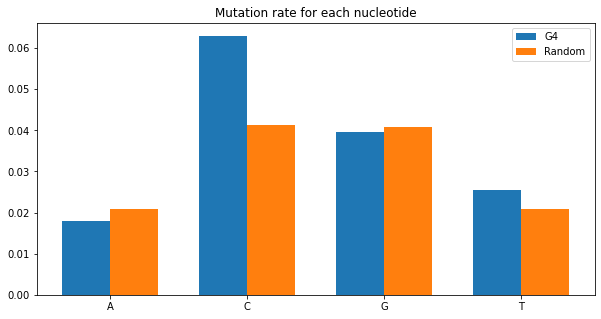

In [111]:
largeur = .35
labels = ['A','C','G','T']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(4)])


r1 = ax.bar(x - largeur/2, [taux_A,taux_C,taux_G,taux_T], largeur)
r2 = ax.bar(x + largeur/2, [taux_A_rd, taux_C_rd, taux_G_rd, taux_T_rd], largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4', 'Random'])

plt.title('Mutation rate for each nucleotide')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig15.jpg')
plt.show()

### Analyse des nucléotides dans l'ensemble des chr

In [143]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader_rd = pd.read_csv(file, delimiter=',')

file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader = pd.read_csv(file)

In [144]:
nb_G_G4 = 11779730
nb_C_G4 = 2763947 - 1464904/2
nb_A_G4 = 2913392
nb_T_G4 = 2231649
#chiffres trouvés après analyse bash des fichiers 

In [145]:
nb_G_G4_rd = 3561288
nb_C_G4_rd = 4227556 - 1336068/2
nb_A_G4_rd = 4995278
nb_T_G4_rd = 5000140
#chiffres trouvés après analyse bash des fichiers

In [146]:
file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random/chr_random_2_final.csv')
reader2_rd = pd.read_csv(file2, delimiter=',')
reader2_rd = reader2_rd.drop('Unnamed: 0',axis =1)
reader2_rd.drop([1,3], axis = 0)

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS
0,2,12385,esv3589586,G,<CN0>,100,PASS,"AC=3;AF=0.000599042;AN=5008;CIEND=0,500;CIPOS=...",NaN,15937,15965,Canonical,7007,NaN,NaN,NaN
2,2,15953,rs11896882,G,A,100,PASS,AC=92;AF=0.0183706;AN=5008;NS=2504;DP=20037;EA...,.|||;VT=SNP,15937,15965,Canonical,7007,NaN,NaN,NaN
4,2,23163,esv3589587,C,<CN2>,100,PASS,AC=3;AF=0.000599042;AN=5008;CS=DUP_gs;END=9961...,NaN,39121,39146,Bulge,2013,NaN,NaN,NaN
5,2,41177,rs568687781,A,G,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19635;E...,.|||;VT=SNP,41159,41188,GVBQ,2013,NaN,NaN,NaN
6,2,41187,rs80074258,T,C,100,PASS,AC=27;AF=0.00539137;AN=5008;NS=2504;DP=19906;E...,.|||;VT=SNP,41159,41188,GVBQ,2013,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43360,2,243073393,rs569948112,CTTA,C,100,PASS,AC=10;AF=0.00199681;AN=5008;NS=2504;DP=22705;E...,NaN,243073363,243073397,GVBQ,9006,NaN,NaN,NaN
43361,2,243082431,rs562870785,G,A,100,PASS,AC=6;AF=0.00119808;AN=5008;NS=2504;DP=18025;EA...,.|||;VT=SNP,243082403,243082434,Canonical,6682,NaN,NaN,NaN
43362,2,243164875,rs375360405,CAA,C,100,PASS,AC=17;AF=0.00339457;AN=5008;NS=2504;DP=15600;E...,NaN,243164877,243164895,GVBQ,2900,NaN,NaN,NaN
43363,2,243177577,rs530860990,CTCTT,C,100,PASS,AC=6;AF=0.00119808;AN=5008;NS=2504;DP=19162;EA...,NaN,243177560,243177581,Bulge,65,NaN,NaN,NaN


 grep -o -i "G" * | wc -l

In [147]:
list_chr = [str(i+1) for i in range (22)] + ['X']

taux_G = 0
taux_C = 0
taux_T = 0
taux_A = 0

taux_G_rd = 0
taux_C_rd = 0
taux_T_rd = 0
taux_A_rd = 0

for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2, delimiter=',')
    
    count_mut = reader2[['orig','mut']]
    count_mut['number'] = 1
    count_orig = count_mut[['orig','number']].groupby(['orig']).sum()
    count_orig = count_orig.reset_index()
    
    taux_G += float(count_orig[count_orig['orig'] == 'G']['number'] / nb_G_G4)
    taux_C += float(count_orig[count_orig['orig'] == 'C']['number'] / nb_C_G4)
    taux_A += float(count_orig[count_orig['orig'] == 'A']['number'] / nb_A_G4)
    taux_T += float(count_orig[count_orig['orig'] == 'T']['number'] / nb_T_G4)
    
    
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2_rd = pd.read_csv(file2, delimiter=',')
    
    count_mut_rd = reader2_rd[['orig','mut']]
    count_mut_rd['number'] = 1
    count_orig_rd = count_mut_rd[['orig','number']].groupby(['orig']).sum()
    count_orig_rd = count_orig_rd.reset_index()
    
    taux_G_rd += float(count_orig_rd[count_orig_rd['orig'] == 'G']['number'] / nb_G_G4_rd)
    taux_C_rd += float(count_orig_rd[count_orig_rd['orig'] == 'C']['number'] / nb_C_G4_rd)
    taux_A_rd += float(count_orig_rd[count_orig_rd['orig'] == 'A']['number'] / nb_A_G4_rd)
    taux_T_rd += float(count_orig_rd[count_orig_rd['orig'] == 'T']['number'] / nb_T_G4_rd)

<ipython-input-147-cc570af3e91e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut['number'] = 1
<ipython-input-147-cc570af3e91e>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut_rd['number'] = 1


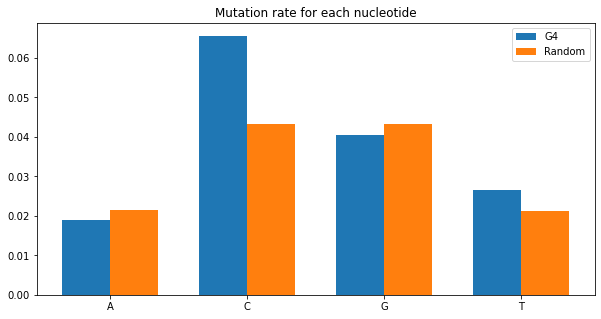

In [148]:
### largeur = .35
labels = ['A','C','G','T']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(4)])


r1 = ax.bar(x - largeur/2, [taux_A,taux_C,taux_G,taux_T], largeur)
r2 = ax.bar(x + largeur/2, [taux_A_rd, taux_C_rd, taux_G_rd, taux_T_rd], largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4', 'Random'])

plt.title('Mutation rate for each nucleotide')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig15.jpg')
plt.show()

### Etude en prenant en compte les fréquences

#### Création d'une colonne recensant les fréquences

In [149]:
file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_1_final.csv')
reader2 = pd.read_csv(file2, delimiter=',')
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,1,11008,rs575272151,C,G,100,PASS,AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2232;EA...,.|||;VT=SNP,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg
1,1,11012,rs544419019,C,G,100,PASS,AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2090;EA...,.|||;VT=SNP,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg
2,1,11063,rs561109771,T,G,100,PASS,AC=15;AF=0.00299521;AN=5008;NS=2504;DP=2834;EA...,.|||;VT=SNP,11058,11078,Canonical,33,0,0,0,gggctggggcggggggaggg
3,1,14674,rs561913721,G,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=26402;E...,g|||;VT=SNP;EX_TARGET,14664,14683,Bulge,1267,0,0,0,GGGTCTGGGGGGGAAGGTG
4,1,16738,rs549612027,G,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=16499;E...,g|||;VT=SNP,16707,16739,Bulge,20,0,0,0,GGAGCtgggggtggtggtgggggcggtggggg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64158,1,249240217,rs570135855;rs556759920,G,"GT,T",100,PASS,"AC=368,183;AF=0.0734824,0.0365415;AN=5008;NS=2...",NaN,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...
64159,1,249240219,rs370070114,A,T,100,PASS,AC=1454;AF=0.290335;AN=5008;NS=2504;DP=149437;...,.|||;VT=SNP,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...
64160,1,249240537,rs549505823,GGT,G,100,PASS,AC=2272;AF=0.453674;AN=5008;NS=2504;DP=66563;E...,NaN,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...
64161,1,249240539,rs545682552,T,G,100,PASS,AC=1682;AF=0.335863;AN=5008;NS=2504;DP=56555;E...,.|||;VT=SNP,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...


In [150]:
a = reader2["INFOS"].str.split(";").to_list()

In [151]:
liste_AF = [b[1][3:] for b in a]

In [152]:
reader2["AF"] = liste_AF
reader2[reader2["mut"].str.contains(",")]

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence,AF
34,1,720968,rs184456771,G,"C,T",100,PASS,"AC=20,11;AF=0.00399361,0.00219649;AN=5008;NS=2...",.|||;VT=SNP;MULTI_ALLELIC,720954,720976,Canonical,4465,0,0,0,ggggtagggggaggggggaggg,"0.00399361,0.00219649"
65,1,789922,rs143149010,C,"A,T",100,PASS,"AC=16,26;AF=0.00319489,0.00519169;AN=5008;NS=2...",.|||;VT=SNP;MULTI_ALLELIC,789904,789948,Bulge,1284,0,0,0,GGGAACCAGAGGAGCTACGAAGGGAGGCAGTGGGGACTGGTGGG,"0.00319489,0.00519169"
276,1,900953,rs115880359,C,"A,T",100,PASS,"AC=47,6;AF=0.00938498,0.00119808;AN=5008;NS=25...",C|||;VT=SNP;MULTI_ALLELIC,900945,900966,Canonical,189,1,1,1,GGGGTCCCGGGAAGGGTGGGG,"0.00938498,0.00119808"
402,1,956061,rs199682825,A,"AGGGGGGGG,AGGGGGGGGG",100,PASS,"AC=1430,10;AF=0.285543,0.00199681;AN=5008;NS=2...",NaN,956049,956068,Canonical,10,1,0,1,GGGGCCTGGGGAGGGGGGG,"0.285543,0.00199681"
522,1,985699,rs145111679,C,"A,T",100,PASS,"AC=2,11;AF=0.000399361,0.00219649;AN=5008;NS=2...",C|||;VT=SNP;MULTI_ALLELIC;EX_TARGET,985699,985737,Bulge,237,0,2,0,GGGACCTGGGGTCGGTGGGGCAGGAGCAGGGGGAAGGG,"0.000399361,0.00219649"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63778,1,247010054,rs553271709;rs531191952,T,"G,TG",100,PASS,"AC=8,19;AF=0.00159744,0.00379393;AN=5008;NS=25...",NaN,247010054,247010077,Bulge,1849,0,0,0,GGGGGGATGGGGGTGGGGAGGTg,"0.00159744,0.00379393"
63796,1,247166094,rs535223876;rs568264055,AG,"AGG,A",100,PASS,"AC=89,24;AF=0.0177716,0.00479233;AN=5008;NS=25...",NaN,247166094,247166121,GVBQ,4816,0,0,0,GGGGGGGGCAgcaaaggacttgaaggg,"0.0177716,0.00479233"
64071,1,248744177,rs181454473,G,"C,T",100,PASS,"AC=9,9;AF=0.00179712,0.00179712;AN=5008;NS=250...",g|||;VT=SNP;MULTI_ALLELIC,248744162,248744200,Canonical,10438,0,0,0,gggaagggtactgggggggggtgaaggggtaggtgggg,"0.00179712,0.00179712"
64157,1,249240214,rs527602186;rs535261737,A,"AG,G",100,PASS,"AC=8,101;AF=0.00159744,0.0201677;AN=5008;NS=25...",NaN,249239892,249240621,G-track,54,0,0,0,ggggtaggggtagggttagggttagggttagggttagggttagggt...,"0.00159744,0.0201677"


In [153]:
n = 0
liste = []
for index, row in reader2[reader2["mut"].str.contains(",")].iterrows():
    mut = row["mut"].split(",")
    AF = row["AF"].split(",")
    mut1 = row
    mut2 = row
    mut1["mut"] = mut[0]
    mut2["mut"] = mut[1]
    mut1["AF"] = float(AF[0])
    mut2["AF"] = float(AF[1])
    n += 1
    
    liste.append(mut1)
    liste.append(mut2)
    
    if n % 100 == 0:
        print(n)

reader2 = reader2[~reader2["mut"].str.contains(",")].append(liste)
reader2 = reader2.drop_duplicates()

100
200
300
400
500
600


In [154]:
n = len(reader2[reader2["AF"].astype(float) > 0.5])
b = list([1]*n - reader2[reader2["AF"].astype(float) > 0.5]["AF"].astype(float))
index = reader2[reader2["AF"].astype(float) > 0.5]["AF"].index.tolist()
reader2["AF"].loc[index] = b

In [155]:
reader2["INFOS"][0]

'AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2232;EAS_AF=0.0367;AMR_AF=0.0965;AFR_AF=0.1346;EUR_AF=0.0885;SAS_AF=0.0716;'

Le procédé pas à pas étant efficace, on compile tout sous une unique fonction pour pouvoir l'appliquer à l'ensemble des chromosomes.

In [40]:
def column_AF(reader2):
    a = reader2["INFOS"].str.split(";").to_list()
    liste_AF = [b[1][3:] for b in a]
    reader2["AF"] = liste_AF
    reader2[reader2["mut"].str.contains(",")]
    
    n = 0
    liste = []
    for index, row in reader2[reader2["mut"].str.contains(",")].iterrows():
        mut = row["mut"].split(",")
        AF = row["AF"].split(",")
        mut1 = row
        mut2 = row
        mut1["mut"] = mut[0]
        mut2["mut"] = mut[1]
        mut1["AF"] = float(AF[0])
        mut2["AF"] = float(AF[1])
        n += 1

        liste.append(mut1)
        liste.append(mut2)

    reader2 = reader2[~reader2["mut"].str.contains(",")].append(liste)
    reader2 = reader2.drop_duplicates()
    
    n = len(reader2[reader2["AF"].astype(float) > 0.5])
    b = list([1]*n - reader2[reader2["AF"].astype(float) > 0.5]["AF"].astype(float))
    index = reader2[reader2["AF"].astype(float) > 0.5]["AF"].index.tolist()
    reader2["AF"].loc[index] = b
    return reader2

    
def select_AF_freq(reader2):
    return reader2[reader2["AF"].astype(float) > 0.1]

def select_AF_rare(reader2):
    return reader2[reader2["AF"].astype(float) < 0.01]

def select_AF_reste(reader2):
    a = reader2[reader2["AF"].astype(float) >= 0.01]
    a = a[a["AF"].astype(float) <= 0.1]
    return a

On reprend maintenant les analyses sur les nucléotides en prenant en compte les fréquences de mutations.

In [157]:
list_chr = [str(i+1) for i in range (22)] + ['X']

isole = [0,0,0]
cluster = [0,0,0]
rd = [0,0,0]

n_is = 0
n_clus = 0
n_rd = 0


for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2, delimiter=',')
    reader2["length"] = reader2["end"] - reader2["start"]
    
    reader_AF = column_AF(reader2)
    AF_freq = select_AF_freq(reader_AF)
    AF_rare = select_AF_rare(reader_AF)
    AF_reste = select_AF_reste(reader_AF)
    
    cluster[0] += len(AF_freq[AF_freq["distClosestG4"] < 100])
    isole[0] += len(AF_freq[AF_freq["distClosestG4"] >= 100])
    cluster[1] += len(AF_rare[AF_rare["distClosestG4"] < 100])
    isole[1] += len(AF_rare[AF_rare["distClosestG4"] >= 100])
    
    isole[2] += len(AF_reste[AF_reste["distClosestG4"] >= 100])
    cluster[2] += len(AF_reste[AF_reste["distClosestG4"] < 100])


    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2_rd = pd.read_csv(file2, delimiter=',')
    reader2_rd["length"] = reader2_rd["end"] - reader2_rd["start"]
    
    reader_rd_AF = column_AF(reader2_rd)
    AF_freq_rd = select_AF_freq(reader_rd_AF)
    AF_rare_rd = select_AF_rare(reader_rd_AF)
    AF_reste_rd = select_AF_reste(reader_rd_AF)
    rd[0] += len(AF_freq_rd)
    rd[1] += len(AF_rare_rd)
    rd[2] += len(AF_reste_rd)
    


In [158]:
file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader = pd.read_csv(file)
reader["length"] = reader["end"] - reader["start"]
n_clus = reader[reader["distClosestG4"] < 100]["length"].sum()
n_is = reader[reader["distClosestG4"] >= 100]["length"].sum()

In [159]:
file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader = pd.read_csv(file)
reader["length"] = reader["end"] - reader["start"]
n_rd = reader["length"].sum()

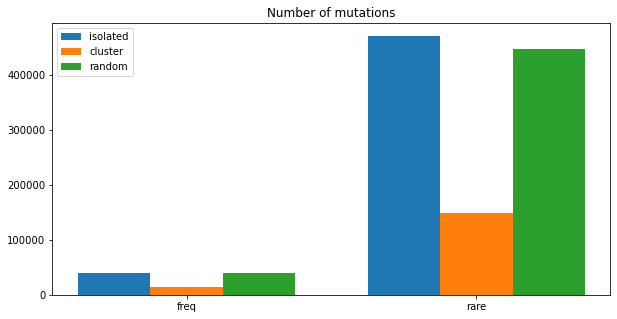

In [160]:
largeur = .25
labels = ['freq', 'rare']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(2)])


r1 = ax.bar(x - largeur, isole[:2], largeur)
r2 = ax.bar(x, cluster[:2], largeur)
r3 = ax.bar(x + largeur, rd[:2], largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['isolated', 'cluster', 'random'])

plt.title('Number of mutations')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig17.jpg')
plt.show()

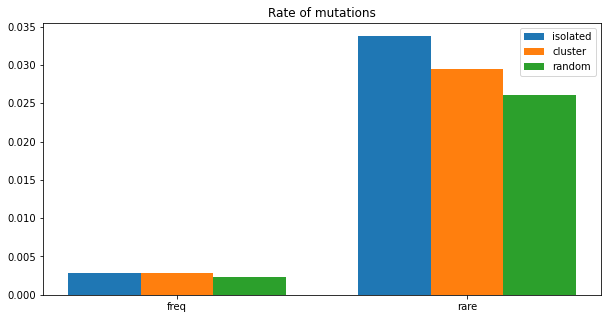

In [161]:
largeur = .25
labels = ['freq', 'rare']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(2)])


r1 = ax.bar(x - largeur, np.array(isole[:2])/n_is, largeur)
r2 = ax.bar(x, np.array(cluster[:2])/n_clus, largeur)
r3 = ax.bar(x + largeur, np.array(rd[:2])/n_rd, largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['isolated', 'cluster', 'random'])

plt.title('Rate of mutations')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig17.jpg')
plt.show()

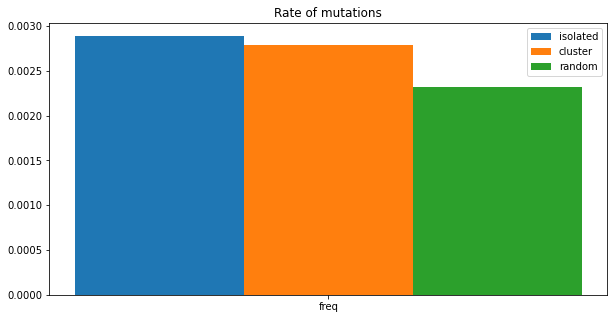

In [162]:
largeur = .25
labels = ['freq']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(1)])


r1 = ax.bar(x - largeur, np.array(isole[:1])/n_is, largeur)
r2 = ax.bar(x, np.array(cluster[:1])/n_clus, largeur)
r3 = ax.bar(x + largeur, np.array(rd[:1])/n_rd, largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['isolated', 'cluster', 'random'])

plt.title('Rate of mutations')

plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig18.jpg')
plt.show()

#### En prenant en compte les taux de C et G

In [10]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader = pd.read_csv(file, delimiter=',')
#reader = reader[reader['type'] != 'G-track']
reader

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,chr1,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg
1,chr1,11058,11078,Canonical,33,0,0,0,gggctggggcggggggaggg
2,chr1,12487,12514,Bulge,1410,0,0,0,GGGTGGTAGGTGCAGAGACGGGAGGGG
3,chr1,14664,14683,Bulge,1267,0,0,0,GGGTCTGGGGGGGAAGGTG
4,chr1,15949,15973,Bulge,687,0,0,0,GGAGCCGGGAGGTGGGGAACAGGG
...,...,...,...,...,...,...,...,...,...
732447,chrY,59362173,59362191,Canonical,370,0,0,0,gggcgggcgggctgaggg
732448,chrY,59362560,59362587,Canonical,9,0,0,0,gggtgagggtgagggttggggttgggg
732449,chrY,59362595,59363470,G-track,9,0,0,0,ggggttggggttggggttggggttggggttagggtttgggtttagg...
732450,chrY,59363480,59363508,Bulge,11,0,0,0,gggtgtgtgtgggtgtggtgtgtgtggg


In [11]:
reader["length"] = reader["end"] - reader["start"]
reader["A"] = reader["sequence"].str.count('a') + reader["sequence"].str.count('A')
reader["C"] = reader["sequence"].str.count('c') + reader["sequence"].str.count('C')
reader["G"] = reader["sequence"].str.count('g') + reader["sequence"].str.count('G')
reader["T"] = reader["sequence"].str.count('t') + reader["sequence"].str.count('T')
reader["%CG"] = (reader["C"] + reader["G"])/reader["length"]*100
reader

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence,length,A,C,G,T,%CG
0,chr1,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg,18,0,1,15,2,88.888889
1,chr1,11058,11078,Canonical,33,0,0,0,gggctggggcggggggaggg,20,1,2,16,1,90.000000
2,chr1,12487,12514,Bulge,1410,0,0,0,GGGTGGTAGGTGCAGAGACGGGAGGGG,27,5,2,17,3,70.370370
3,chr1,14664,14683,Bulge,1267,0,0,0,GGGTCTGGGGGGGAAGGTG,19,2,1,13,3,73.684211
4,chr1,15949,15973,Bulge,687,0,0,0,GGAGCCGGGAGGTGGGGAACAGGG,24,5,3,15,1,75.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732447,chrY,59362173,59362191,Canonical,370,0,0,0,gggcgggcgggctgaggg,18,1,3,13,1,88.888889
732448,chrY,59362560,59362587,Canonical,9,0,0,0,gggtgagggtgagggttggggttgggg,27,2,0,19,6,70.370370
732449,chrY,59362595,59363470,G-track,9,0,0,0,ggggttggggttggggttggggttggggttagggtttgggtttagg...,875,126,0,479,270,54.742857
732450,chrY,59363480,59363508,Bulge,11,0,0,0,gggtgtgtgtgggtgtggtgtgtgtggg,28,0,0,18,10,64.285714


In [12]:
cluster = reader[reader["distClosestG4"] < 100]
isole = reader[reader["distClosestG4"] >= 100]

In [13]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader2 = pd.read_csv(file)
#reader2 = reader2[reader2['type'] != 'G-track']
reader2

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,chr1,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt
1,chr1,11469,11503,Canonical,918,NaN,NaN,NaN,GGGAAACACCCGGAGCATATGCTGTTTGGTCTCA
2,chr1,16111,16130,Bulge,2181,NaN,NaN,NaN,GGGCACTGACTTCTGCAAC
3,chr1,18311,18332,Bulge,2181,NaN,NaN,NaN,GGGCCAAGGAGACCTTCTCTC
4,chr1,24560,24590,Bulge,2197,NaN,NaN,NaN,CCAGGAGTAAAAGCTTCCAAGTTGGGCTCT
...,...,...,...,...,...,...,...,...,...
668029,chr21,48080453,48080472,GVBQ,13906,NaN,NaN,NaN,ATGAATGAGACCTCACAGG
668030,chr21,48097556,48097580,Canonical,2272,NaN,NaN,NaN,caccatttattaaatagggaatcc
668031,chr21,48099852,48099882,GVBQ,2272,NaN,NaN,NaN,ggttcaaagctgattgggaagagtgtgatc
668032,chr21,48113314,48113335,GVBQ,4140,NaN,NaN,NaN,gtctttgccccattttatatt


In [14]:
reader2["length"] = reader2["end"] - reader2["start"]
reader2["A"] = reader2["sequence"].str.count('a') + reader2["sequence"].str.count('A')
reader2["C"] = reader2["sequence"].str.count('c') + reader2["sequence"].str.count('C')
reader2["G"] = reader2["sequence"].str.count('g') + reader2["sequence"].str.count('G')
reader2["T"] = reader2["sequence"].str.count('t') + reader2["sequence"].str.count('T')
reader2["%CG"] = (reader2["C"] + reader2["G"])/reader2["length"]*100
reader2

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence,length,A,C,G,T,%CG
0,chr1,10525,10551,Bulge,918,NaN,NaN,NaN,gccttcagagtaccaccgaaatctgt,26,7,8,5,6,50.000000
1,chr1,11469,11503,Canonical,918,NaN,NaN,NaN,GGGAAACACCCGGAGCATATGCTGTTTGGTCTCA,34,8,8,10,8,52.941176
2,chr1,16111,16130,Bulge,2181,NaN,NaN,NaN,GGGCACTGACTTCTGCAAC,19,4,6,5,4,57.894737
3,chr1,18311,18332,Bulge,2181,NaN,NaN,NaN,GGGCCAAGGAGACCTTCTCTC,21,4,7,6,4,61.904762
4,chr1,24560,24590,Bulge,2197,NaN,NaN,NaN,CCAGGAGTAAAAGCTTCCAAGTTGGGCTCT,30,8,7,8,7,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668029,chr21,48080453,48080472,GVBQ,13906,NaN,NaN,NaN,ATGAATGAGACCTCACAGG,19,7,4,5,3,47.368421
668030,chr21,48097556,48097580,Canonical,2272,NaN,NaN,NaN,caccatttattaaatagggaatcc,24,9,5,3,7,33.333333
668031,chr21,48099852,48099882,GVBQ,2272,NaN,NaN,NaN,ggttcaaagctgattgggaagagtgtgatc,30,8,3,11,8,46.666667
668032,chr21,48113314,48113335,GVBQ,4140,NaN,NaN,NaN,gtctttgccccattttatatt,21,3,5,2,11,33.333333


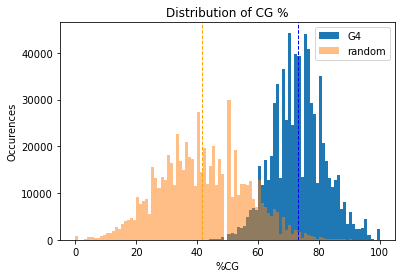

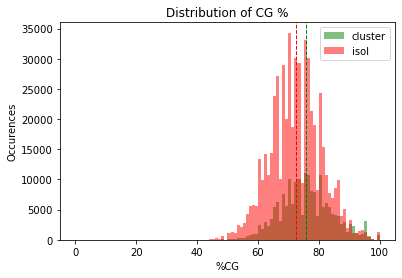

In [21]:
CG_perc = reader["%CG"]
CG_clus = cluster["%CG"]
CG_is = isole["%CG"]
CG_perc_rd = reader2["%CG"]
plt.hist(CG_perc, range = (0,100), bins = 100)
plt.hist(CG_perc_rd, range = (0,100), bins = 100, alpha = 0.5)
plt.legend(['G4', 'random'])

plt.axvline(CG_perc.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(CG_perc_rd.mean(), color='orange', linestyle='dashed', linewidth=1)

plt.xlabel('%CG')
plt.ylabel('Occurences')

plt.title('Distribution of CG %')

plt.show()


plt.hist(CG_clus, range = (0,100), bins = 100, alpha = 0.5, color = 'green')
plt.hist(CG_is, range = (0,100), bins = 100, alpha = 0.5, color = 'red')
plt.legend(['cluster', 'isol'])

plt.axvline(CG_clus.mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(CG_is.mean(), color='red', linestyle='dashed', linewidth=1)


plt.xlabel('%CG')
plt.ylabel('Occurences')


plt.title('Distribution of CG %')

plt.show()

In [37]:
def ACGT(reader):
    reader[reader['type'] != 'G-track']
    reader["length"] = reader["end"] - reader["start"]
    reader["A"] = reader["sequence"].str.count('a') + reader["sequence"].str.count('A')
    reader["C"] = reader["sequence"].str.count('c') + reader["sequence"].str.count('C')
    reader["G"] = reader["sequence"].str.count('g') + reader["sequence"].str.count('G')
    reader["T"] = reader["sequence"].str.count('t') + reader["sequence"].str.count('T')
    reader["%CG"] = (reader["C"] + reader["G"])/reader["length"]*100
    return reader

In [5]:
list_chr = [str(i+1) for i in range (22)] + ['X']

pas = 5
taille = (30)//pas

list_mut = [0]*taille
list_mut_rd = [0]*taille
list_length = [0]*taille
list_length_rd = [0]*taille

for i in (list_chr):
    print(i)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader = pd.read_csv(file)
    reader = ACGT(reader)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file)
    reader2 = ACGT(reader2)
    
    for j in range (40,70,pas) :
        reader_quar = reader[reader["%CG"] >= j]
        reader_quar = reader_quar[reader_quar["%CG"] < j+pas]
        reader_quar_rd = reader2[reader2["%CG"] >= j]
        reader_quar_rd = reader_quar_rd[reader_quar_rd["%CG"] < j+pas]
        list_mut[j//pas-40//pas] += len(reader_quar)
        list_mut_rd[j//pas-40//pas] += len(reader_quar_rd)
        
        
        
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader3 = pd.read_csv(file)
reader3 = ACGT(reader3)
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader4 = pd.read_csv(file)
reader4 = ACGT(reader4)

for j in range (40,70,pas) :
    reader3b = reader3[reader3["%CG"] >= j]
    reader3b = reader3b[reader3b["%CG"] < j + pas]
    reader4b = reader4[reader4["%CG"] >= j]
    reader4b = reader4b[reader4b["%CG"] < j + pas]


    list_length[j//pas-40//pas] += reader3b["length"].sum()
    list_length_rd[j//pas-40//pas] += reader4b["length"].sum()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X


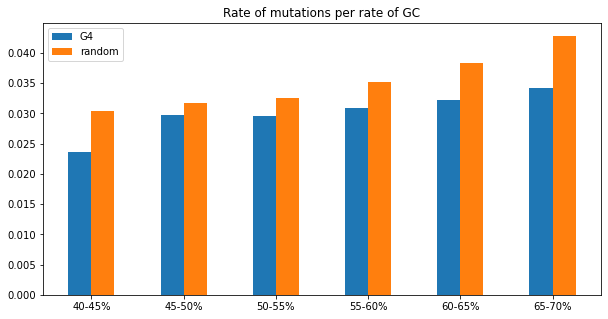

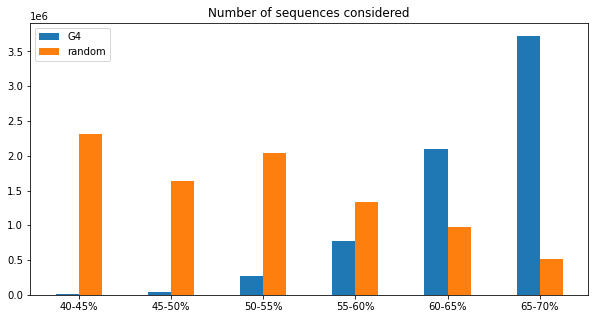

[6267, 34904, 263465, 778122, 2095387, 3723143]
[2312942, 1636544, 2034901, 1335388, 982045, 512412]


In [6]:
largeur = .25
labels = ['40-45%', '45-50%', '50-55%', '55-60%', '60-65%', '65-70%']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut))])


r1 = ax.bar(x - largeur/2, np.array(list_mut)/np.array(list_length), largeur)
r2 = ax.bar(x + largeur/2, np.array(list_mut_rd)/np.array(list_length_rd), largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4','random'])

plt.title('Rate of mutations per rate of GC')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')

plt.show()

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut))])

r1 = ax.bar(x - largeur/2, np.array(list_length), largeur)
r2 = ax.bar(x + largeur/2, np.array(list_length_rd), largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(['G4','random'])

plt.title('Number of sequences considered')

plt.show()


print(list_length)
print(list_length_rd)

On sépare maintenant les données entre mutations rares et fréquentes.

In [8]:
def column_AF(reader2):
    a = reader2["INFOS"].str.split(";").to_list()
    liste_AF = [b[1][3:] for b in a]
    reader2["AF"] = liste_AF
    
    #On s'occupe des lignes où il y a deux mutations possibles, contenant donc une virgule
    n = 0
    liste = []
    for index, row in reader2[reader2["mut"].str.contains(",")].iterrows():
        mut = row["mut"].split(",")
        AF = row["AF"].split(",")
        mut1 = row
        mut2 = row
        mut1["mut"] = mut[0]
        mut2["mut"] = mut[1]
        mut1["AF"] = float(AF[0])
        mut2["AF"] = float(AF[1])
        n += 1

        liste.append(mut1)
        liste.append(mut2)

    reader2 = reader2[~reader2["mut"].str.contains(",")].append(liste)
    reader2 = reader2.drop_duplicates()
    
    #On convertir les probas > 0.5 en leur inverse 1-p
    n = len(reader2[reader2["AF"].astype(float) > 0.5])
    b = list([1]*n - reader2[reader2["AF"].astype(float) > 0.5]["AF"].astype(float))
    index = reader2[reader2["AF"].astype(float) > 0.5]["AF"].index.tolist()
    reader2["AF"].loc[index] = b
    return reader2

    
def select_AF_freq(reader2):
    return reader2[reader2["AF"].astype(float) > 0.1]

def select_AF_rare(reader2):
    return reader2[reader2["AF"].astype(float) < 0.01]

def select_AF_reste(reader2):
    a = reader2[reader2["AF"].astype(float) >= 0.01]
    a = a[a["AF"].astype(float) <= 0.1]
    return a

In [16]:
list_chr = [str(i+1) for i in range (22)] + ['X']

pas = 5
fin = 100
debut = 40
taille = (fin-debut)//pas

list_mut_f = [0]*taille
list_mut_r = [0]*taille
list_mut_rd_f = [0]*taille
list_mut_rd_r = [0]*taille
list_length = [0]*taille
list_length_rd = [0]*taille

for i in (list_chr):
    print(i)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader = pd.read_csv(file)
    reader = ACGT(reader)
    reader = column_AF(reader)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file)
    reader2 = ACGT(reader2)
    reader2 = column_AF(reader2)
    
    
    for j in range (debut,fin,pas) :
        reader_quar = reader[reader["%CG"] >= j]
        reader_quar = reader_quar[reader_quar["%CG"] < j+pas]
        reader_quar_rd = reader2[reader2["%CG"] >= j]
        reader_quar_rd = reader_quar_rd[reader_quar_rd["%CG"] < j+pas]
        
        AF_freq = select_AF_freq(reader_quar)
        AF_rare = select_AF_rare(reader_quar)
        AF_freq_rd = select_AF_freq(reader_quar_rd)
        AF_rare_rd = select_AF_rare(reader_quar_rd)
        
        list_mut_f[j//pas-debut//pas] += len(AF_freq)
        list_mut_rd_f[j//pas-debut//pas] += len(AF_freq_rd)
        list_mut_r[j//pas - debut//pas] += len(AF_rare)
        list_mut_rd_r[j//pas - debut//pas] += len(AF_rare_rd)
        
        
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader3 = pd.read_csv(file)
reader3 = ACGT(reader3)
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader4 = pd.read_csv(file)
reader4 = ACGT(reader4)

for j in range (debut,fin,pas) :
    reader3b = reader3[reader3["%CG"] >= j]
    reader3b = reader3b[reader3b["%CG"] < j + pas]
    reader4b = reader4[reader4["%CG"] >= j]
    reader4b = reader4b[reader4b["%CG"] < j + pas]

    list_length[j//pas-debut//pas] += reader3b["length"].sum()
    list_length_rd[j//pas-debut//pas] += reader4b["length"].sum()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X


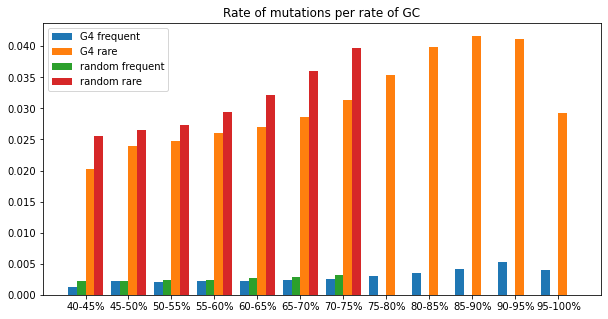

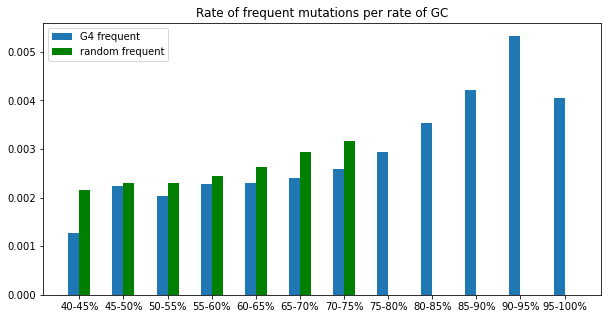

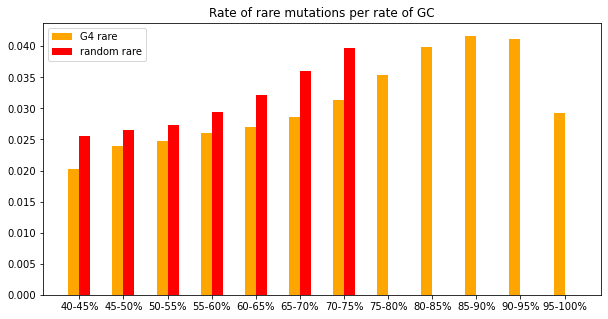

In [17]:
largeur = .2
labels = [str(i)+"-"+str(i+pas)+"%" for i in range (debut,fin,pas)]
list_mut_rd_f[7:] = [0]*len(list_mut_rd_f[7:])
list_mut_rd_r[7:] = [0]*len(list_mut_rd_r[7:])

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_f))])


r1 = ax.bar(x - 3*largeur/2, np.array(list_mut_f)/np.array(list_length), largeur)
r2 = ax.bar(x + largeur/2, np.array(list_mut_r)/np.array(list_length), largeur)
r3 = ax.bar(x - largeur/2, np.array(list_mut_rd_f)/np.array(list_length_rd), largeur)
r4 = ax.bar(x + 3*largeur/2, np.array(list_mut_rd_r)/np.array(list_length_rd), largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4 frequent', 'G4 rare', 'random frequent', 'random rare'])

plt.title('Rate of mutations per rate of GC')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')
plt.show()





largeur = .25

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_f))])


r1 = ax.bar(x - largeur/2, np.array(list_mut_f)/np.array(list_length), largeur)
r2 = ax.bar(x + largeur/2, np.array(list_mut_rd_f)/np.array(list_length_rd), largeur, color = 'green')



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4 frequent', 'random frequent'])

plt.title('Rate of frequent mutations per rate of GC')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')
plt.show()




largeur = .25

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_f))])


r1 = ax.bar(x - largeur/2, np.array(list_mut_r)/np.array(list_length), largeur, color = 'orange')
r2 = ax.bar(x + largeur/2, np.array(list_mut_rd_r)/np.array(list_length_rd), largeur, color = 'red')



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4 rare', 'random rare'])

plt.title('Rate of rare mutations per rate of GC')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')
plt.show()

<ipython-input-18-f92c0bba4b4c>:9: RuntimeWarning: invalid value encountered in true_divide
  r2 = ax.bar(x + largeur/2, np.array(list_mut_rd_f)/np.array(list_mut_rd_r), largeur)


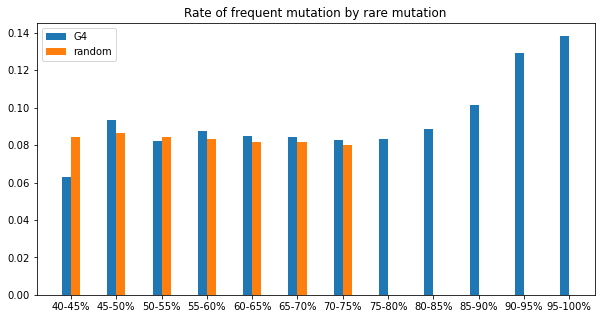

In [18]:
largeur = .2
labels = labels = [str(i)+"-"+str(i+pas)+"%" for i in range (debut,fin,pas)]

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_f))])


r1 = ax.bar(x - largeur/2, np.array(list_mut_f)/np.array(list_mut_r), largeur)
r2 = ax.bar(x + largeur/2, np.array(list_mut_rd_f)/np.array(list_mut_rd_r), largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4','random'])

plt.title('Rate of frequent mutation by rare mutation')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')
plt.show()


On voit une différence dans le taux de mutation dans les G4 qui est plus faible, pour autant le ratio frequente/rare n'est pas différent : il s'agit donc uniquement d'un effet mutagène, et pas d'un effet sélectif. Si on voit moins de mutations chez les G4 c'est donc uniquement parce qu'ils mutent moins et pas parce que les mutations sont moins sélectionnées.

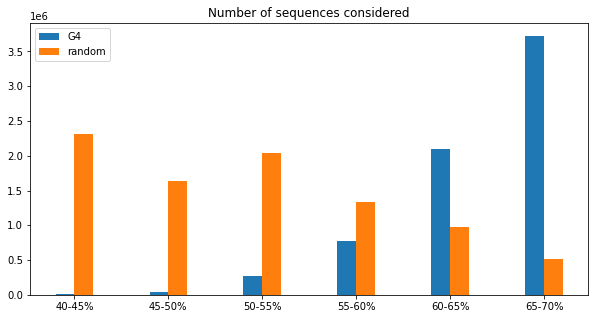

[6267, 34904, 263465, 778122, 2095387, 3723143]
[2312942, 1636544, 2034901, 1335388, 982045, 512412]


In [12]:
plt.show()

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut))])

r1 = ax.bar(x - largeur/2, np.array(list_length), largeur)
r2 = ax.bar(x + largeur/2, np.array(list_length_rd), largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(['G4','random'])

plt.title('Number of sequences considered')

plt.show()


print(list_length)
print(list_length_rd)

#### Séparation en Cluster / Isolé

In [13]:
list_chr = [str(i+1) for i in range (22)] + ['X']

pas = 5
debut = 40
fin = 70
taille = (fin-debut)//pas

list_mut_f = np.zeros((2,taille))
list_mut_r = np.zeros((2,taille))
list_mut_rd_f = np.zeros(taille)
list_mut_rd_r = np.zeros(taille)
list_length = np.zeros((2,taille))
list_length_rd = np.zeros(taille)

for i in (list_chr):
    print(i)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader = pd.read_csv(file)
    reader = ACGT(reader)
    reader = column_AF(reader)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file)
    reader2 = ACGT(reader2)
    reader2 = column_AF(reader2)
    
    
    for j in range (debut,fin,pas) :
        reader_quar = reader[reader["%CG"] >= j]
        reader_quar = reader_quar[reader_quar["%CG"] < j+pas]
        reader_quar_rd = reader2[reader2["%CG"] >= j]
        reader_quar_rd = reader_quar_rd[reader_quar_rd["%CG"] < j+pas]
        
        AF_freq = select_AF_freq(reader_quar)
        AF_rare = select_AF_rare(reader_quar)
        AF_freq_rd = select_AF_freq(reader_quar_rd)
        AF_rare_rd = select_AF_rare(reader_quar_rd)
        
        
        list_mut_f[0,j//pas-debut//pas] += len(AF_freq[AF_freq["distClosestG4"] <= 100])
        list_mut_f[1,j//pas-debut//pas] += len(AF_freq[AF_freq["distClosestG4"] > 100])
        list_mut_rd_f[j//pas-debut//pas] += len(AF_freq_rd)
        list_mut_r[0,j//pas-debut//pas] += len(AF_rare[AF_rare["distClosestG4"] <= 100])
        list_mut_r[1,j//pas-debut//pas] += len(AF_rare[AF_rare["distClosestG4"] > 100])
        list_mut_rd_r[j//pas - debut//pas] += len(AF_rare_rd)
        
        
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader3 = pd.read_csv(file)
reader3 = ACGT(reader3)
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader4 = pd.read_csv(file)
reader4 = ACGT(reader4)

for j in range (debut,fin,pas) :
    reader3b = reader3[reader3["%CG"] >= j]
    reader3b = reader3b[reader3b["%CG"] < j + pas]
    reader4b = reader4[reader4["%CG"] >= j]
    reader4b = reader4b[reader4b["%CG"] < j + pas]

    list_length[0,j//pas-debut//pas] += reader3b[reader3b["distClosestG4"] <= 100]["length"].sum()
    list_length[1,j//pas-debut//pas] += reader3b[reader3b["distClosestG4"] > 100]["length"].sum()
    list_length_rd[j//pas-debut//pas] += reader4b["length"].sum()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X


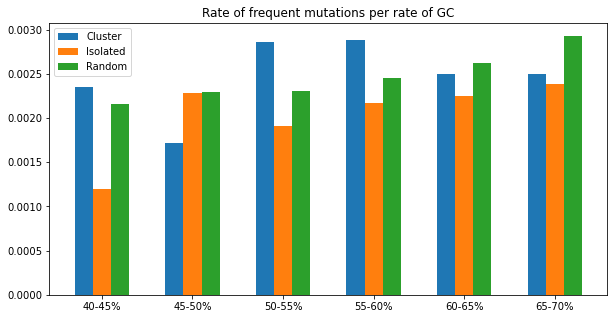

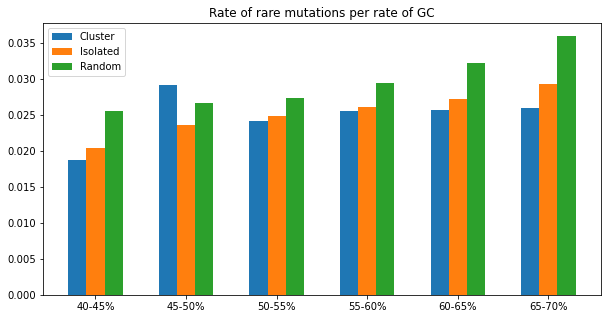

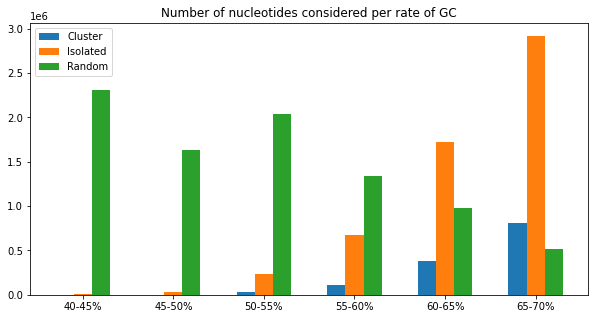

[4.26000e+02 2.91900e+03 3.21570e+04 1.09180e+05 3.77869e+05 8.04195e+05]
[   5841.   31985.  231308.  668942. 1717518. 2918948.]
[2312942. 1636544. 2034901. 1335388.  982045.  512412.]


In [15]:
largeur = .2
labels = ['40-45%', '45-50%', '50-55%', '55-60%', '60-65%', '65-70%']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_f[0]))])


r1 = ax.bar(x - largeur, list_mut_f[0]/list_length[0], largeur)
r2 = ax.bar(x , list_mut_f[1]/list_length[1], largeur)
r3 = ax.bar(x + largeur, list_mut_rd_f/list_length_rd, largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['Cluster', 'Isolated', 'Random'])

plt.title('Rate of frequent mutations per rate of GC')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')
plt.show()

#########################################################


largeur = .2
labels = ['40-45%', '45-50%', '50-55%', '55-60%', '60-65%', '65-70%']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_f[0]))])


r1 = ax.bar(x - largeur, list_mut_r[0]/list_length[0], largeur)
r2 = ax.bar(x , list_mut_r[1]/list_length[1], largeur)
r3 = ax.bar(x + largeur, list_mut_rd_r/list_length_rd, largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['Cluster', 'Isolated', 'Random'])

plt.title('Rate of rare mutations per rate of GC')

plt.show()

####################################################################


largeur = .2
labels = ['40-45%', '45-50%', '50-55%', '55-60%', '60-65%', '65-70%']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_f[0]))])


r1 = ax.bar(x - largeur, list_length[0], largeur)
r2 = ax.bar(x , list_length[1], largeur)
r3 = ax.bar(x + largeur, list_length_rd, largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['Cluster', 'Isolated', 'Random'])

plt.title('Number of nucleotides considered per rate of GC')

plt.show()
print(list_length[0]) 
print(list_length[1])
print(list_length_rd)

#### Ori

In [2]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotatedRand.bed')
reader = pd.read_csv(file, delimiter='\t')
reader

,chr,start,end,type,distClosestG4,sequence,CGI,Ori,TSS
0,chr1,10525,10551,Bulge,918,gccttcagagtaccaccgaaatctgt,0,0,0
1,chr1,11469,11503,Canonical,918,GGGAAACACCCGGAGCATATGCTGTTTGGTCTCA,0,0,0
2,chr1,16111,16130,Bulge,2181,GGGCACTGACTTCTGCAAC,0,0,0
3,chr1,18311,18332,Bulge,2181,GGGCCAAGGAGACCTTCTCTC,0,0,0
4,chr1,24560,24590,Bulge,2197,CCAGGAGTAAAAGCTTCCAAGTTGGGCTCT,0,0,0
...,...,...,...,...,...,...,...,...,...
668029,chr21,48080453,48080472,GVBQ,13906,ATGAATGAGACCTCACAGG,0,0,0
668030,chr21,48097556,48097580,Canonical,2272,caccatttattaaatagggaatcc,0,0,0
668031,chr21,48099852,48099882,GVBQ,2272,ggttcaaagctgattgggaagagtgtgatc,0,0,0
668032,chr21,48113314,48113335,GVBQ,4140,gtctttgccccattttatatt,0,0,0


In [38]:
list_chr = [str(i+1) for i in range (22)] + ['X']

pas = 5
fin = 100
debut = 40
taille = (fin-debut)//pas

list_mut_ori = [0]*taille
list_mut_nono = [0]*taille
list_mut_rd_ori = [0]*taille
list_mut_rd_nono = [0]*taille
list_length = [0]*taille
list_length_rd = [0]*taille

for i in (list_chr):
    print(i)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader = pd.read_csv(file)
    reader = ACGT(reader)
    
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file)
    reader2 = ACGT(reader2)
    
    
    
    for j in range (debut,fin,pas) :
        reader_quar = reader[reader["%CG"] >= j]
        reader_quar = reader_quar[reader_quar["%CG"] < j+pas]
        reader_quar_rd = reader2[reader2["%CG"] >= j]
        reader_quar_rd = reader_quar_rd[reader_quar_rd["%CG"] < j+pas]
        
        Ori = reader_quar[reader_quar["Ori"] > 0]
        NonOri = reader_quar[reader_quar["Ori"] == 0]
        Ori_rd = reader_quar_rd[reader_quar_rd["Ori"] > 0]
        NonOri_rd = reader_quar_rd[reader_quar_rd["Ori"] == 0]
        
        list_mut_ori[j//pas-debut//pas] += len(Ori)
        list_mut_rd_ori[j//pas-debut//pas] += len(Ori_rd)
        list_mut_nono[j//pas - debut//pas] += len(NonOri)
        list_mut_rd_nono[j//pas - debut//pas] += len(NonOri_rd)
        
        
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader3 = pd.read_csv(file)
reader3 = ACGT(reader3)
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader4 = pd.read_csv(file)
reader4 = ACGT(reader4)

for j in range (debut,fin,pas) :
    reader3b = reader3[reader3["%CG"] >= j]
    reader3b = reader3b[reader3b["%CG"] < j + pas]
    reader4b = reader4[reader4["%CG"] >= j]
    reader4b = reader4b[reader4b["%CG"] < j + pas]

    list_length[j//pas-debut//pas] += reader3b["length"].sum()
    list_length_rd[j//pas-debut//pas] += reader4b["length"].sum()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X


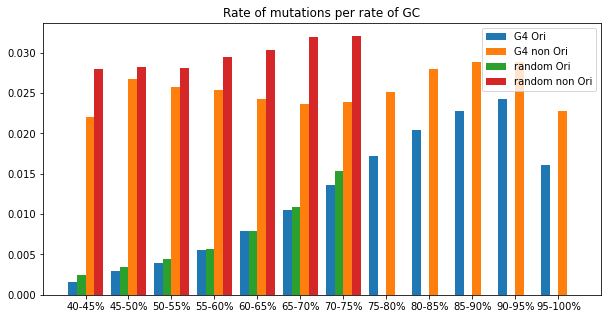

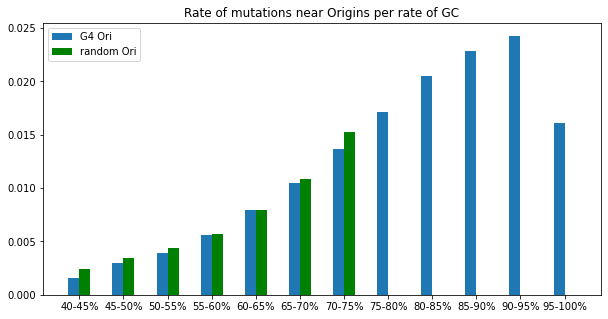

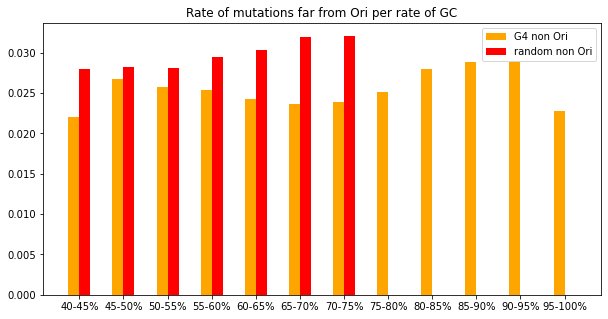

In [40]:
largeur = .2
labels = [str(i)+"-"+str(i+pas)+"%" for i in range (debut,fin,pas)]
list_mut_rd_ori[7:] = [0]*len(list_mut_rd_ori[7:])
list_mut_rd_nono[7:] = [0]*len(list_mut_rd_nono[7:])

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_ori))])


r1 = ax.bar(x - 3*largeur/2, np.array(list_mut_ori)/np.array(list_length), largeur)
r2 = ax.bar(x + largeur/2, np.array(list_mut_nono)/np.array(list_length), largeur)
r3 = ax.bar(x - largeur/2, np.array(list_mut_rd_ori)/np.array(list_length_rd), largeur)
r4 = ax.bar(x + 3*largeur/2, np.array(list_mut_rd_nono)/np.array(list_length_rd), largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4 Ori', 'G4 non Ori', 'random Ori', 'random non Ori'])

plt.title('Rate of mutations per rate of GC')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')
plt.show()





largeur = .25

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_ori))])


r1 = ax.bar(x - largeur/2, np.array(list_mut_ori)/np.array(list_length), largeur)
r2 = ax.bar(x + largeur/2, np.array(list_mut_rd_ori)/np.array(list_length_rd), largeur, color = 'green')



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4 Ori', 'random Ori'])

plt.title('Rate of mutations near Origins per rate of GC')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')
plt.show()




largeur = .25

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_nono))])


r1 = ax.bar(x - largeur/2, np.array(list_mut_nono)/np.array(list_length), largeur, color = 'orange')
r2 = ax.bar(x + largeur/2, np.array(list_mut_rd_nono)/np.array(list_length_rd), largeur, color = 'red')



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4 non Ori', 'random non Ori'])

plt.title('Rate of mutations far from Ori per rate of GC')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')
plt.show()

In [46]:
def column_AF(reader2):
    a = reader2["INFOS"].str.split(";").to_list()
    liste_AF = [b[1][3:] for b in a]
    reader2["AF"] = liste_AF
    
    #On s'occupe des lignes où il y a deux mutations possibles, contenant donc une virgule
    n = 0
    liste = []
    for index, row in reader2[reader2["mut"].str.contains(",")].iterrows():
        mut = row["mut"].split(",")
        AF = row["AF"].split(",")
        mut1 = row
        mut2 = row
        mut1["mut"] = mut[0]
        mut2["mut"] = mut[1]
        mut1["AF"] = float(AF[0])
        mut2["AF"] = float(AF[1])
        n += 1

        liste.append(mut1)
        liste.append(mut2)

    reader2 = reader2[~reader2["mut"].str.contains(",")].append(liste)
    reader2 = reader2.drop_duplicates()
    
    #On convertir les probas > 0.5 en leur inverse 1-p
    n = len(reader2[reader2["AF"].astype(float) > 0.5])
    b = list([1]*n - reader2[reader2["AF"].astype(float) > 0.5]["AF"].astype(float))
    index = reader2[reader2["AF"].astype(float) > 0.5]["AF"].index.tolist()
    reader2["AF"].loc[index] = b
    return reader2

    
def select_AF_freq(reader2):
    return reader2[reader2["AF"].astype(float) > 0.1]

def select_AF_rare(reader2):
    return reader2[reader2["AF"].astype(float) < 0.01]

def select_AF_reste(reader2):
    a = reader2[reader2["AF"].astype(float) >= 0.01]
    a = a[a["AF"].astype(float) <= 0.1]
    return a

In [50]:
list_chr = [str(i+1) for i in range (22)] + ['X']

pas = 5
debut = 50
fin = 70
taille = (fin-debut)//pas

list_mut_f_ori = np.zeros((2,taille))
list_mut_f_nonori = np.zeros((2,taille))
list_mut_r_ori = np.zeros((2,taille))
list_mut_r_nonori = np.zeros((2,taille))
list_length_ori = np.zeros((2,taille))
list_length_nonori = np.zeros((2,taille))

for i in (list_chr):
    print(i)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader = pd.read_csv(file)
    reader = ACGT(reader)
    reader = column_AF(reader)
    
    
    for j in range (debut,fin,pas) :
        reader_quar = reader[reader["%CG"] >= j]
        reader_quar = reader_quar[reader_quar["%CG"] < j+pas]
        reader_quar_rd = reader2[reader2["%CG"] >= j]
        reader_quar_rd = reader_quar_rd[reader_quar_rd["%CG"] < j+pas]
        
        AF_freq = select_AF_freq(reader_quar)
        AF_rare = select_AF_rare(reader_quar)
        
        AF_f_ori = AF_freq[AF_freq["Ori"] > 0]
        AF_f_nonori = AF_freq[AF_freq["Ori"] == 0]
        AF_r_ori = AF_rare[AF_rare["Ori"] > 0]
        AF_r_nonori = AF_rare[AF_rare["Ori"] == 0]
        
        
        list_mut_f_ori[0,j//pas-debut//pas] += len(AF_f_ori[AF_f_ori["distClosestG4"] <= 100])
        list_mut_f_ori[1,j//pas-debut//pas] += len(AF_f_ori[AF_f_ori["distClosestG4"] > 100])
        list_mut_f_nonori[0,j//pas-debut//pas] += len(AF_f_nonori[AF_f_nonori["distClosestG4"] <= 100])
        list_mut_f_nonori[1,j//pas-debut//pas] += len(AF_f_nonori[AF_f_nonori["distClosestG4"] > 100])
        list_mut_r_ori[0,j//pas-debut//pas] += len(AF_r_ori[AF_r_ori["distClosestG4"] <= 100])
        list_mut_r_ori[1,j//pas-debut//pas] += len(AF_r_ori[AF_r_ori["distClosestG4"] > 100])
        list_mut_r_nonori[0,j//pas-debut//pas] += len(AF_r_nonori[AF_r_nonori["distClosestG4"] <= 100])
        list_mut_r_nonori[1,j//pas-debut//pas] += len(AF_r_nonori[AF_r_nonori["distClosestG4"] > 100])
        
        
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader3 = pd.read_csv(file)
reader3 = ACGT(reader3)

for j in range (debut,fin,pas) :
    reader3b = reader3[reader3["%CG"] >= j]
    reader3b = reader3b[reader3b["%CG"] < j + pas]
    
    Ori = reader3b[reader3b["Ori"] > 0]
    NonOri = reader3b[reader3b["Ori"] == 0]

    list_length_ori[0,j//pas-debut//pas] += Ori[Ori["distClosestG4"] <= 100]["length"].sum()
    list_length_ori[1,j//pas-debut//pas] += Ori[Ori["distClosestG4"] > 100]["length"].sum()
    list_length_nonori[0,j//pas-debut//pas] += NonOri[NonOri["distClosestG4"] <= 100]["length"].sum()
    list_length_nonori[1,j//pas-debut//pas] += NonOri[NonOri["distClosestG4"] > 100]["length"].sum()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X


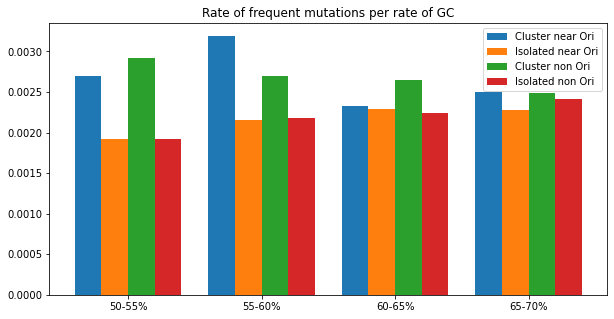

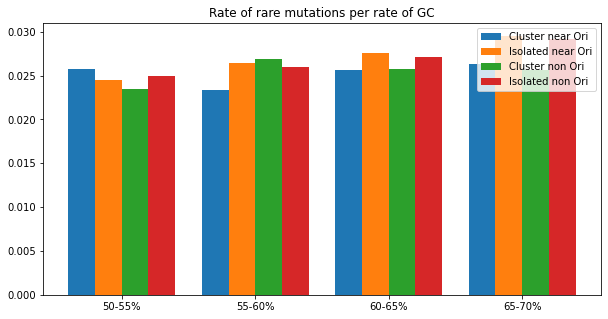

In [52]:
largeur = .2
labels = [ '50-55%', '55-60%', '60-65%', '65-70%']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_f_ori[0]))])


r1 = ax.bar(x - 3*largeur/2, list_mut_f_ori[0]/list_length_ori[0], largeur)
r2 = ax.bar(x - largeur/2, list_mut_f_ori[1]/list_length_ori[1], largeur)
r3 = ax.bar(x + largeur/2, list_mut_f_nonori[0]/list_length_nonori[0], largeur)
r4 = ax.bar(x + 3*largeur/2, list_mut_f_nonori[1]/list_length_nonori[1], largeur)




ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['Cluster near Ori', 'Isolated near Ori', 'Cluster non Ori', 'Isolated non Ori'])

plt.title('Rate of frequent mutations per rate of GC')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')
plt.show()



####################################################################


largeur = .2
labels = [ '50-55%', '55-60%', '60-65%', '65-70%']

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut_r_ori[0]))])


r1 = ax.bar(x - 3*largeur/2, list_mut_r_ori[0]/list_length_ori[0], largeur)
r2 = ax.bar(x - largeur/2, list_mut_r_ori[1]/list_length_ori[1], largeur)
r3 = ax.bar(x + largeur/2, list_mut_r_nonori[0]/list_length_nonori[0], largeur)
r4 = ax.bar(x + 3*largeur/2, list_mut_r_nonori[1]/list_length_nonori[1], largeur)




ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['Cluster near Ori', 'Isolated near Ori', 'Cluster non Ori', 'Isolated non Ori'])

plt.title('Rate of rare mutations per rate of GC')

plt.show()

### Tests

In [42]:
def ACGT(reader):
    reader[reader['type'] != 'G-track']
    reader["length"] = reader["end"] - reader["start"]
    reader["A"] = reader["sequence"].str.count('a') + reader["sequence"].str.count('A')
    reader["C"] = reader["sequence"].str.count('c') + reader["sequence"].str.count('C')
    reader["G"] = reader["sequence"].str.count('g') + reader["sequence"].str.count('G')
    reader["T"] = reader["sequence"].str.count('t') + reader["sequence"].str.count('T')
    reader["%CG"] = (reader["C"] + reader["G"])/reader["length"]*100
    return reader

In [43]:
list_chr = [str(i+1) for i in range (22)] + ['X']

pas = 5
debut = 10
fin = 90
taille = (fin-debut)//pas


list_mut = [0]*taille
list_mut_rd = [0]*taille
list_length = [0]*taille
list_length_rd = [0]*taille

for i in (list_chr):
    print(i)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader = pd.read_csv(file)
    reader = ACGT(reader)
    file = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr_random_{i}_final_sansN.csv')
    reader2 = pd.read_csv(file)
    reader2 = ACGT(reader2)
    
    for j in range (debut,fin,pas) :
        reader_quar = reader[reader["%CG"] >= j]
        reader_quar = reader_quar[reader_quar["%CG"] < j+pas]
        reader_quar_rd = reader2[reader2["%CG"] >= j]
        reader_quar_rd = reader_quar_rd[reader_quar_rd["%CG"] < j+pas]
        list_mut[j//pas-debut//pas] += len(reader_quar)
        list_mut_rd[j//pas-debut//pas] += len(reader_quar_rd)
        
        
        
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader3 = pd.read_csv(file)
reader3 = ACGT(reader3)
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/random_G4_explicit_sansN.csv')
reader4 = pd.read_csv(file)
reader4 = ACGT(reader4)

for j in range (debut,fin,pas) :
    reader3b = reader3[reader3["%CG"] >= j]
    reader3b = reader3b[reader3b["%CG"] < j + pas]
    reader4b = reader4[reader4["%CG"] >= j]
    reader4b = reader4b[reader4b["%CG"] < j + pas]


    list_length[j//pas-debut//pas] += reader3b["length"].sum()
    list_length_rd[j//pas-debut//pas] += reader4b["length"].sum()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X


In [44]:
print(list_mut_rd)

[6830, 13598, 27104, 46479, 62906, 62404, 70353, 51893, 66247, 46935, 37567, 21931, 10057, 4729, 1647, 560]


<ipython-input-45-966b4c698160>:11: RuntimeWarning: invalid value encountered in true_divide
  r1 = ax.bar(x - largeur/2, np.array(list_mut)/np.array(list_length), largeur)


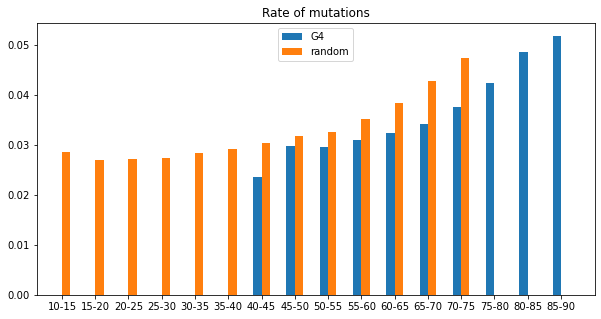

In [45]:
largeur = .25
labels = [str(i)+"-"+str(i+pas) for i in range(debut,fin,pas)]

fig, ax = plt.subplots(figsize = (10,5))
x = np.array([i for i in range(len(list_mut))])

list_mut[:6] = [0]*6
list_mut_rd[13:] = [0]*(len(list_mut_rd[13:]))


r1 = ax.bar(x - largeur/2, np.array(list_mut)/np.array(list_length), largeur)
r2 = ax.bar(x + largeur/2, np.array(list_mut_rd)/np.array(list_length_rd), largeur)



ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(['G4','random'])

plt.title('Rate of mutations')

#plt.savefig('C:/Users/BlueC/Documents/Mines/Santé/Données et commentaires/fig19.jpg')

plt.show()